In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import skew
import statistics
import math

In [3]:
df = pd.read_csv("data_file/study_performance.csv")

In [4]:
df.shape

(1000, 8)

In [5]:
df.count()

gender                         1000
race_ethnicity                 1000
parental_level_of_education    1000
lunch                          1000
test_preparation_course        1000
math_score                     1000
reading_score                  1000
writing_score                  1000
dtype: int64

In [6]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df[df["gender"] == "female"].gender.count()

518

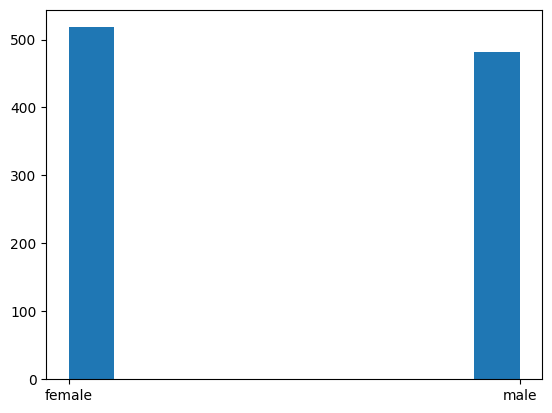

In [8]:
plt.hist(df["gender"])
plt.show()

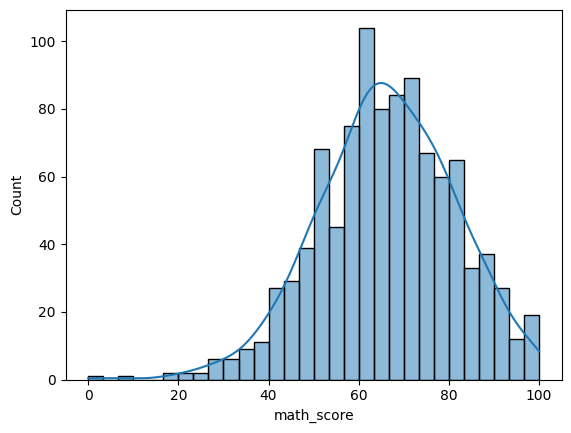

In [9]:
sns.histplot(df["math_score"], kde=True, bins=30)
plt.show()

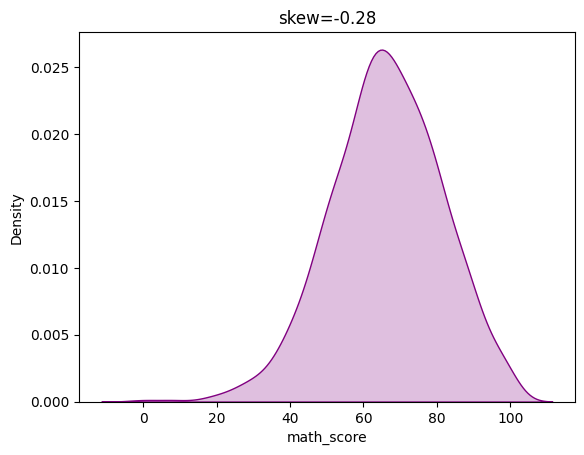

In [10]:
sns.kdeplot(df["math_score"], fill=True, color="purple")
plt.title(f"skew={np.round(skew(df["math_score"]), 2)}")
plt.show()

In [11]:
math_score = list(df["math_score"])

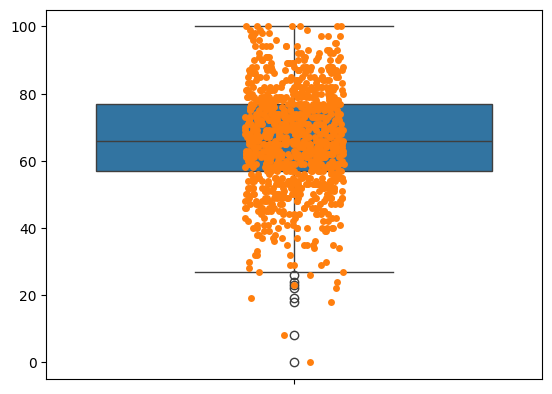

In [12]:
sns.boxplot(math_score)
sns.stripplot(math_score)
plt.show()

In [13]:
THRESHOLD = 2
outliers = []
for item in math_score:

    mean = np.mean(math_score)
    sd = np.std(math_score)

    z_test = (item - mean) / sd

    if np.abs(z_test) > THRESHOLD:
        outliers.append(item)
outliers


[18,
 97,
 33,
 0,
 30,
 27,
 98,
 99,
 22,
 100,
 97,
 35,
 34,
 99,
 97,
 99,
 28,
 24,
 35,
 27,
 100,
 100,
 26,
 29,
 97,
 32,
 30,
 29,
 35,
 100,
 100,
 29,
 98,
 35,
 32,
 19,
 23,
 97,
 97,
 32,
 34,
 100,
 35,
 98,
 100,
 8]

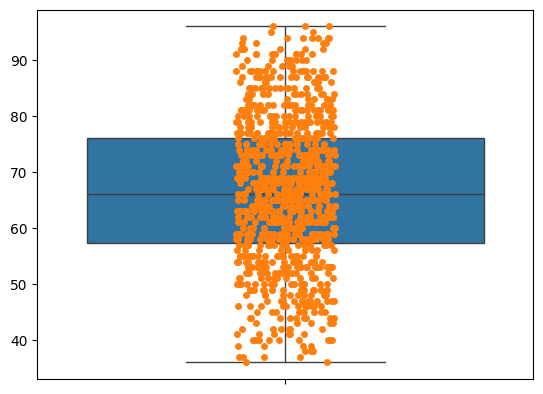

In [14]:
clean_data = [item for item in math_score if item not in outliers]
sns.boxplot(clean_data)
sns.stripplot(clean_data)
plt.show()

In [15]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [29]:
genius_female = df[(df["gender"] == "female") & (df["parental_level_of_education"] == "master's degree") & (df["math_score"] > 80)]
genius_male = df[(df["gender"] == "male") & (df["parental_level_of_education"] == "master's degree") & (df["math_score"] > 80)]

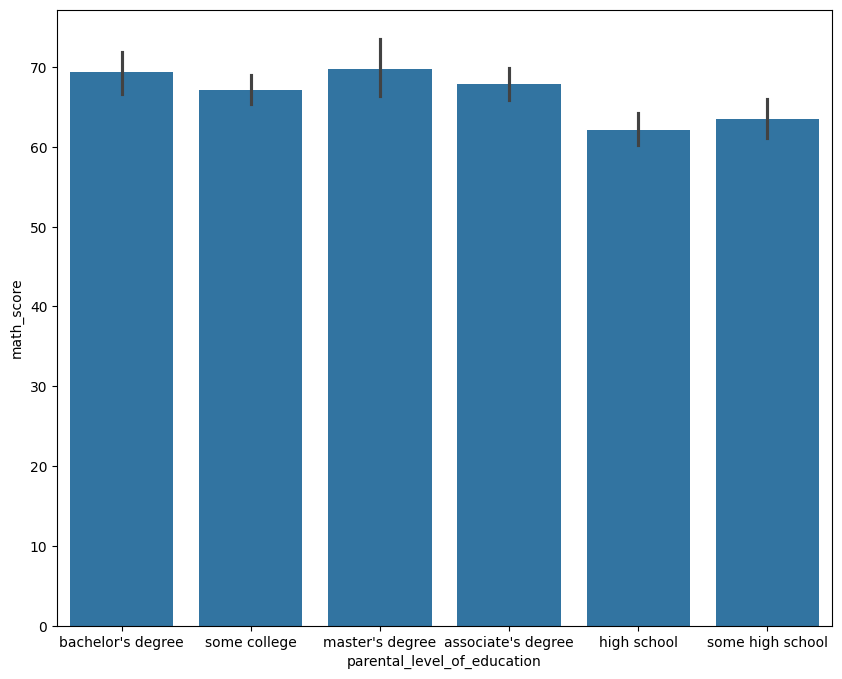

In [48]:
plt.figure(figsize=(10, 8))
sns.barplot(df, x="parental_level_of_education", y="math_score")
plt.show()

In [50]:
df[df["parental_level_of_education"] == "bachelor's degree"]["math_score"].mean()

69.38983050847457

In [51]:
genius_male

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
128,male,group D,master's degree,standard,none,82,82,74
130,male,group D,master's degree,standard,none,89,84,82
604,male,group D,master's degree,free/reduced,completed,84,89,90
618,male,group D,master's degree,standard,none,95,81,84
713,male,group D,master's degree,standard,none,81,81,84
845,male,group E,master's degree,standard,none,90,85,84
846,male,group C,master's degree,standard,completed,91,85,85
900,male,group D,master's degree,standard,none,85,84,89


In [52]:
genius_female

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
106,female,group D,master's degree,standard,none,87,100,100
164,female,group E,master's degree,standard,none,81,92,91
175,female,group C,master's degree,standard,completed,81,91,87
377,female,group D,master's degree,free/reduced,completed,85,95,100
685,female,group E,master's degree,standard,completed,94,99,100
861,female,group E,master's degree,free/reduced,none,81,86,87
957,female,group D,master's degree,standard,none,92,100,100
995,female,group E,master's degree,standard,completed,88,99,95


# concatinating two DataFrame

In [102]:

genius_in_math_person = pd.concat([genius_female, genius_male])
genius_in_math_person

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
106,female,group D,master's degree,standard,none,87,100,100
164,female,group E,master's degree,standard,none,81,92,91
175,female,group C,master's degree,standard,completed,81,91,87
377,female,group D,master's degree,free/reduced,completed,85,95,100
685,female,group E,master's degree,standard,completed,94,99,100
861,female,group E,master's degree,free/reduced,none,81,86,87
957,female,group D,master's degree,standard,none,92,100,100
995,female,group E,master's degree,standard,completed,88,99,95
128,male,group D,master's degree,standard,none,82,82,74


# Extracting data of person whose average math_score, reading_score and writing_score is greater than 90.

In [105]:
new_df = pd.DataFrame(columns=df.columns)
for i in range(len(df) - 1):
    data = df.loc[i]
    score = (data.math_score + data.reading_score + data.writing_score) / 3
    if score > 90:
        new_df.loc[len(new_df)] = data.values
new_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group E,master's degree,standard,completed,88,99,95
1,female,group B,master's degree,standard,none,90,95,93
2,female,group B,some college,standard,completed,88,95,92
3,male,group C,some college,standard,completed,98,86,90
4,female,group D,master's degree,standard,none,87,100,100
5,female,group E,bachelor's degree,standard,completed,99,100,100
6,male,group B,associate's degree,standard,completed,91,89,92
7,female,group C,some college,standard,completed,88,93,93
8,male,group E,associate's degree,free/reduced,completed,100,100,93
9,female,group C,bachelor's degree,standard,completed,96,100,100


In [117]:
new_df.groupby(new_df["gender"]).gender.count()

gender
female    37
male      14
Name: gender, dtype: int64

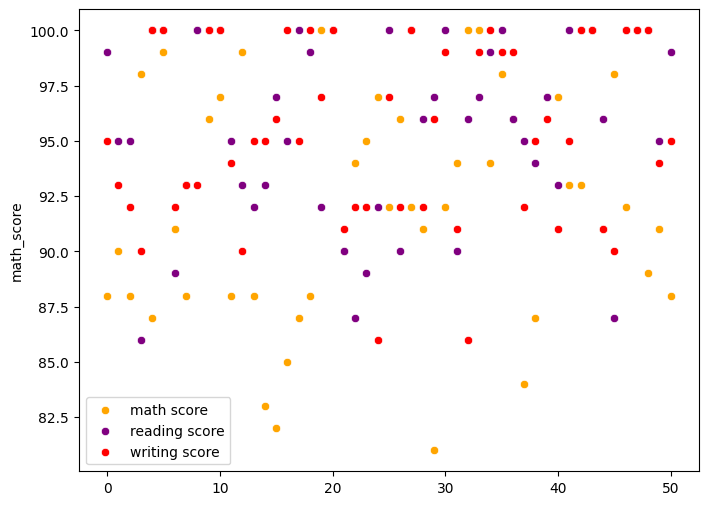

In [135]:
math_score = new_df["math_score"]
plt.figure(figsize=(8, 6))
sns.scatterplot(math_score, color="orange", label="math score")
sns.scatterplot(new_df["reading_score"], color="purple", label="reading score")
sns.scatterplot(new_df["writing_score"], color="red", label="writing score")
plt.show()